In [1]:
from ecologico import Ecologico
from ultimatum import *
from agente import Agente
from estrategias import *
from genome import Genome, World
from graficos import Experimentos

# Análisis ecológico de estrategias para el *ultimatum* game iterado

## Motivación

El único equilibrio de Nash de subjuegos perfectos en el *ultimatum game* es que el oferente ofrezca una suma infinitesimal de dinero al receptor, y que el receptor acepte la oferta (Schuster, 2017). Sin embargo, las personas no suelen adoptar la estrategia óptima de nash en contextos experimentales. Por ejemplo, la oferta mediana en la mayoría de los estudios experimentales es del 50%, la oferta media ronda el 40%, y los receptores suelen rechazar ofertas menores al 50% frecuentemente (Brosnan, 2009).

-> Referencias a otros enfoques que expliquen esto (muchos son medio complicados)?

Las estrategias óptimas en contextos de juegos iterados con comportamientos adaptativos pueden diferir de los equilibrios de Nash estables en contextos de juegos un solo encuentro. Esto es porque en los juegos iterados con comportamientos adaptativos (ICA), los agentes pueden escoger una acción subóptima en un juego que incida en las decisiones de otros agentes en juegos subsiguientes para mejorar sus propios *payoffs* en el largo plazo. Un ejemplo paradigmático de este fenómeno son los estudios de la emergencia de la cooperación en dilemas del prisioinero iterado. En el dilema del prisionero, el único equilibrio de Nash es traicionar al coparticipante. Sin embargo, en contextos ICA, hay estrategias que promueven la cooperación de manera estable y robusta, e implementan comportamientos óptimos en contextos diversos (Axelrod, 1983).

Axelrod estudió la emergencia de la cooperación en contextos de dilema del prisionero ICA a través de un enfoque que denominó **ecología de estrategias**, un enfoque computacional de múltiples agentes que permite identificar estrategias óptimas en una población determinada jugando juegos ICA.

En este trabajo, formulamos un estudio ecológico de estrategias para responder al ultimatum game en contextos ICA, para investigar contextos en que las estrategias óptimas sean diferentes al equilibrio de nash estable en contextos de un solo juego, y generar hipótesis de por qué las personas no suelen implementar el equilibrio de nash estable en contextos experimentales.


## Introducción

### El juego del ultimatum

El *ultimatum game* es un juego asimétrico para dos agentes. Uno de ellos toma la posición de **oferente**. El oferente tiene a su disposición una suma de dinero *X* que debe repartirse con un **receptor**. El oferente le ofrece al receptor un porcentaje de *X*. Si el receptor acepta la propuesta, el receptor recibe el porcentaje propuesto de *X* y el oferente se queda con el restante. Si el receptor rechaza la oferta, ninguno de los dos participantes recibe nada.

En juegos de una sola ronda, el único equilibrio de nash estable de subjuegos perfectos es que el oferente proponga al receptor quedarse con una suma infinitesimal y que el receptor la acepte. El receptor gana más dinero al aceptar una oferta positiva que al no aceptarla, por infinitesimal que sea. Como el comportamiento óptimo para el receptor es aceptar cualquier oferta, el comportamiento óptimo para el oferente es ofrecer al receptor porcentajes infinitesimales. Esto le permitirá maximizar su propia ganancia, asumiendo que el receptor aceptará cualquier oferta.

### De la acción a la estrategia

En juegos de una sola ronda, los agentes deciden una **acción** a ejecutar, considerando las acciones posibles que podría ejecutar el otro agente.

En juegos iterados, los agentes implementan una **estrategia**. Una estrategia es una función que determina qué acción ejecutar, que no solo considera las acciones que podría llevar a cabo el otro agente en cada juego, sino también el **historial** de encuentros entre ambos agentes. Cuando los agentes implementan estrategias, las acciones que ejecutan se adaptan al historial de encuentros, y por lo tanto, las acciones de un agente en un encuentro pueden influir en las acciones del otro agente en los encuentros subsiguientes.

La adaptación de acciones según el historial implica la posibilidad de que existan estrategias óptimas que ejecuten acciones distintas a los equilibrios de nash estables en contextos de una sola ronda. Por ejemplo, en el dilema del prisionero iterado, hay estrategias óptimas que promueven la cooperación, mientras que el equilibrio de nash estable en el dilema del prisionero es traicionar al coparticipante.

### La ecología de estrategias

Así como las estrategias añaden una capa de complejidad a las acciones, porque determinan cómo las acciones se adaptan según el historial de encuentros, la ecología de estrategias añade una segunda capa de complejidad, ya que determina cómo los agentes cambian su estrategia según qué estrategias son más exitosas en una población.

La ecología de estrategias toma un conjunto finito inicial de estrategias *e_i* y una cantidad *n_i* de agentes que empezarán implementando la estrategia *e_i*. Además, toma la topología del grafo en que los agentes jugarán al juego, donde cada agente sólo podrá jugar con sus vecinos en el grafo.

Luego, el sistema evoluciona por **generaciones**. En cada generación, se evalúa el rendimiento de cada estrategia *e_i* y se actualiza la cantidad de agentes *n_i* que implementará cada estrategia *e_i* en la generación siguiente según el rendimiento de cada estrategia en la generación anterior.

Al comenzar una generación, se reparten las estrategias al azar entre los agentes, según los valores *n_i* obtenidos en la generación anterior, o según los valores de inicialización en caso de tratarse de la primera generación. 

Luego se juega una serie de *k* turnos del juego del ultimatum. En cada turno, se escoge una arista al azar en el grafo de manera equiprobable, que determina los dos agentes que jugarán al juego. Luego se escoge de manera equiprobable qué agente será el oferente y qué agente será el receptor. El oferente emite una oferta determinada por la estrategia que implementa, y el receptor decidirá si aceptarla según la estrategia que implementa. En nuestra implementación, la suma a repartir en todos los encuentros entre 10 unidades, y el oferente le ofrece al receptor una suma entera de entre 1 y 9 unidades (incluido).

Después de jugar *k* turnos, se calcula el *fitness* para cada agente. El fitness para cada agente es el dinero medio ganado en sus negociacines, es decir, la cantidad total de dinero que ganó dividido la cantidad de negociaciones en las que participó.

Luego se calcula el rendimiento de las estrategias. El rendimiento $f_i$ de la estrategia *e_i* es la suma de los *fitnesses* de todos los agentes que implementaron la estrategia *e_i*, dividido la suma de los *fitnesses* de todos los agentes que participaron. De esta manera, el fitness *f_i* de cada estrategia *e_i* es la proporción de dinero que se obtuvo implementando la estrategia *e_i*.

Al final de la generación, se actualizan las poblaciones *n_i* usando los valores de *f_i*. La nueva población *n_i* será una proporción de la cantidad total de agentes dada por *f_i*. De esta manera, la población que usa la estrategia *e_i* en una generación está dada por la proporción de puntos que obtuvo la estrategia *e_i* en la generación anterior.

El enfoque ecológico se distingue del mero enfoque iterativo porque ... (el rendimiento de una estrategia depende de la presencia de otras estrategias, el enfoque meramente iterativo puede dar resultados distintos porque no considera la dinámcia de adopción de las estrategias). Si una estrategia gana en un enfoque ecológico es porque funciona bien de manera robusta en su contexto y ...

### Objetivos 

El trabajo se compone de N partes ...





### Las estrategias

Las estrategias tienen dos comportamientos. Una estrategia para proponer un reparto al vecino, a partir del historial de encuentros con el vecino con el que juega, y una estrategia para decidir si aceptar el reparto propuesto por el vecino, a partir del historial de encuentros con el vecino con el que juega y el valor ofrecido por el vecino.

Fuimos probando una serie de estrategias en el enfoque ecológico. Para facilitar la lectura, expondremos el funcionamiento de cada estrategia a medida que la usemos. 

In [20]:
# Declaración de estrategias, cuyo funcionamiento será expuesto a medida que se utilicen en la investigación.

## Estrategias de control

azarosa = (estrat_proponer_rand, estrat_aceptar_rand)
hostil = (estrat_proponer_tacaña, estrat_aceptar_nunca)
promedio = (estrat_proponer_promedio, estrat_aceptar_promedio)
matching = (estrat_proponer_matching, estrat_aceptar_matching)
justa = (estrat_proponer_justa, estrat_aceptar_justa)
gradual = (estrat_proponer_gradual, estrat_aceptar_gradual)
opresora = (estrat_proponer_opresora, estrat_aceptar_opresora)

## Estrategias evaluadas

tacaña = (estrat_proponer_tacaña, estrat_aceptar_siempre)
antitacaña = (estrat_proponer_antitacaña, estrat_aceptar_antitacaña)
antitacaña_v2 = (estrat_proponer_antitacaña_2, estrat_aceptar_antitacaña)
reciproca = (estrat_proponer_t4t, estrat_aceptar_t4t)



0

### Parámetros globales

En los experimentos subsiguientes, analizaremos distintas estrategias en un grafo denso de 100 agentes.

Para la ecología de estrategias, decidimos estudiar el funcionamiento del juego en un conjunto de 100 agentes, durante 100 generaciones, con 5000 encuentros por generación. Así, los agentes negociarán 100 veces en promedio, en cada generación. -> por qué? 100 generaciones fue suficiente para observar estrategias que coparan el comportamiento de todo el mundo. 5000 generaciones es más que suficiente para que se compense una pérdida por rechazar en un primer encuentro con los efectos de la acción de un agente sobre otro en encuentros subsiguientes

Además, decidimos evaluar el comportamiento de los agentes en un grafo aleatorio denso, con una conectividad del 80%, para que los agentes tengan alta probabilidad de encontrarse con cualquier otro -> por qué? 

In [3]:
n_agentes = 100
n_generaciones = 100
n_turnos_por_generacion = 5000 # Observamos que es suficiente para ver efectos de penalizaciones.

# Setear las variables globales para todos los experimentos
experimentos = Experimentos(n_turnos_por_generacion, n_generaciones, n_agentes)

topologia_densa = create_random_adjacency_list(n_agentes, 80*99/2)
### topologia_rala = create_random_adjacency_list(n_agentes, 100-1)

## Desarrollo

### 1 - La estrategia tacaña suele funcionar bien

En primer lugar, analizamos la estrategia **tacaña**, que implementa la estrategia análoga al equilibrio de Nash de subjegos perfectos en contextos de *ultimatum game* de una sola generación, a saber:
- Ofrece siempre 1.
- Acepta cualquier oferta que le presenten.

Para empezar a evaluar la estrategia tacaña, vamos a definir un conjunto de estrategias de control. Para ello, propondremos 7 estrategias de funcionamiento sencillo y seleccionaremos las 4 que obtengan un mejor rendimiento en una ecología de estrategias entre ellas. Esto es un poco arbitrario -> por qué lo hacemos?

La estrategia **azarosa**:
- Ofrece al receptor un valor entero entre 1 y 9 al azar, de manera equiprobable.
- Decide si aceptar o no las ofertas al azar, de manera equiprobable.

La estrategia **hostil**:
- Ofrece siempre 1.
- Rechaza todas las ofertas.

La estrategia **promedio**:
- Ofrece el promedio histórico de las ofertas que le hizo su vecino (redondeado al entero más cercano).
- Acepta una oferta si es igual o mayor al promedio de ofertas hechas por su vecino que aceptó en el pasado.

La estrategia **matching**:
- Ofrece lo que le propusieron en el último encuentro (si no hubo encuentros anteriores, ofrece 5).
- Acepta si le ofrecen una suma igual o mayor que lo que ella misma ofreció el último encuentro (si no hubo encuentros anteriores, acepta cualquier oferta).

La estrategia **opresora**:
- Empieza ofreciendo 4. Si rechazan su propuesta, ofrecerá una unidad menos en el encuentro siguiente. Si aceptan su propuesta, volverá a ofrecer 4 en el encuentro siguiente.
- Empieza esperando 4. Si le ofrecen menos de lo esperado, rechaza la oferta y pasa a esperar una unidad más que en el encuentro anterior. Si le ofrecen igual o más de lo esperado, acepta la oferta y vuelve a esperar 4.

La estrategia **justa**:
- Ofrece 5 siempre
- Acepta una oferta si y solo si el valor ofrecido es mayor o igual a 5.

La estrategia **gradual**:
- Si en el turno anterior aceptaron, ofrece uno menos que en el turno anterior. Si rechazaron, ofrece uno más que en el turno anterior.
- Acepta todas las propuestas.

Para este experimento incial, todas las estrategias inician con una cantidad similar de agentes. Inician con 14 agentes, la azarosa inicia con 16 por redondeo.


In [7]:
"""
Estrategias es un diccionario cuya clave es el nombre de la estrategia y sus valores son una tupla que contiene:
    - La función que determina cuánto proponer, a partir del historial de encuentros.
    - La función que determina cuándo aceptar, a partir del historial de encuentros y el valor propuesto por el otro jugador.
    - La cantidad de agentes que empiezan jugando con dicha estrategia en la primera generación.
"""

estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 16),
    "hostil" : (hostil[0], hostil[1], 12),
    "promedio" : (promedio[0], promedio[1], 12),
    "matching" : (matching[0], matching[1], 12),
    "opresora" : (opresora[0], opresora[1], 12),
    "justa" : (justa[0], justa[1], 12),
    "gradual" : (gradual[0], gradual[1], 12),
    "tacaña" : (tacaña[0], gradual[1], 12)
}

A continuación, vemos un ejemplo de la evolución poblacional en una ejecución de la ecología de estrategias para las poblaciones iniciales recién definidas.

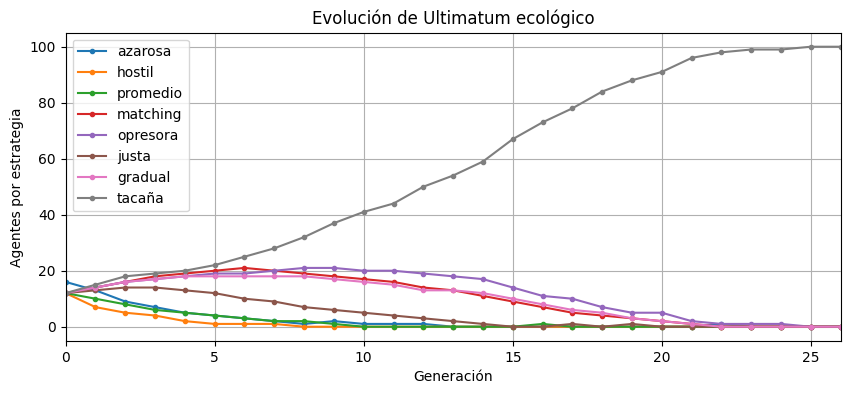

In [8]:
experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

Para esas poblaciones iniciales, la estrategia tacaña gana el 100% de las veces.

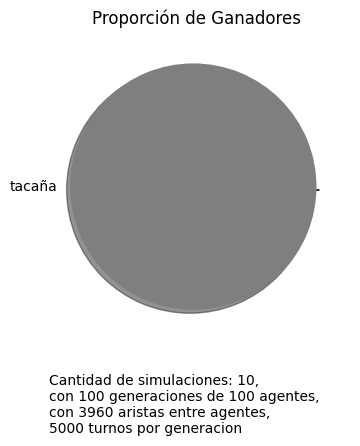

In [9]:
experimentos.graficar_proporcion_ganadores(10, topologia_densa, estrategias)

Podemos modificar las poblaciones iniciales para observar que la estrategia tacaña rinde bien en esos contextos incluso cuando inicia con un menor número inicial de agentes.

In [16]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 13),
    "hostil" : (hostil[0], hostil[1], 13),
    "promedio" : (promedio[0], promedio[1], 13),
    "matching" : (matching[0], matching[1], 12),
    "opresora" : (opresora[0], opresora[1], 12),
    "justa" : (justa[0], justa[1], 13),
    "gradual" : (gradual[0], gradual[1], 13),
    "tacaña" : (tacaña[0], gradual[1], 9)
}

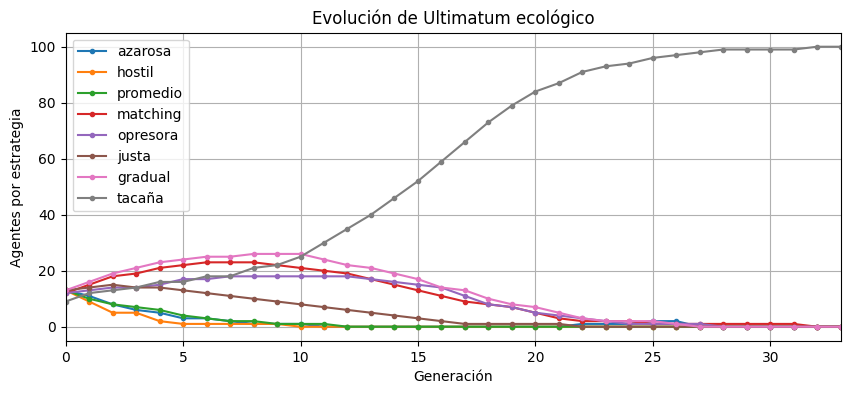

In [17]:
experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

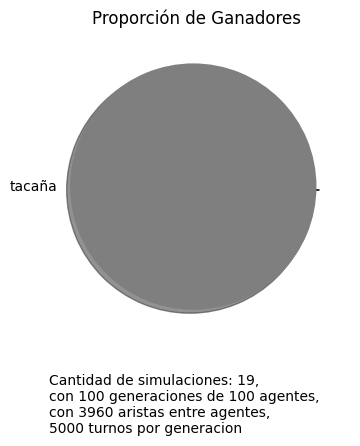

In [18]:
experimentos.graficar_proporcion_ganadores(19, topologia_densa, estrategias)

El mundo en total suele ganar más puntos cuando todos implementan la estrategia tacaña () -> la media de negociaciones cuando todos los agentes implementan la tacaña es la máxima posible.

Esto nos da la pauta de que la estrategia tacaña es buena.

Además, observamos (y observaremos en la sección 4) que un algoritmo genético entrenado para aprender a jugar el ultimatum game evolucionó la estrategia tacaña todas las veces que lo corrimos.

### 2 - Implementaciones *ad-hoc* de una estrategia anti-tacaña

Con esto concluimos que existen contextos donde la estrategia tacaña no es la posta.

La estrategia tacaña igual sobrevive a ataques de estrategias anti-tacañas.

### 3 - La reciprocidad genera una cuenca robusta

La reciprocidad de Axelrod. También llamada *tit for tat* en inglés.

Funciona del siguiente modo.

Promueve la cooperación en contextos de dilema del prisionero iterado. Fue propuesta por Axelrod y Hamilton e impactó en ... Se considera que las emociones de la gratitud y el enfado suelen heurísticas cognitivas que promueven la cooperación en contextos de dilema del prisionero iterado.

(Bloom, 2008)

Se argumentó que parte de las heurísticas que nos llevan a tomar decisiones e


Lo interesante es que muchos agentes que juegan ultimatum game reportan fastidio y/o enfado, lo cual sugiere que implementan esa heurística cognitiva. El argumento evolutivo para ese caso 


- Ver si la reciprocidad emerge en el contexto "de juguete" que vimos antes. Tanto sin la estrategia tacaña como con la estrategia tacaña.

Calculado para 45 agentes.
Calculado para 46 agentes.
Calculado para 47 agentes.
Calculado para 48 agentes.
Calculado para 49 agentes.
Calculado para 50 agentes.
Calculado para 51 agentes.
Calculado para 52 agentes.
Calculado para 53 agentes.
Calculado para 54 agentes.


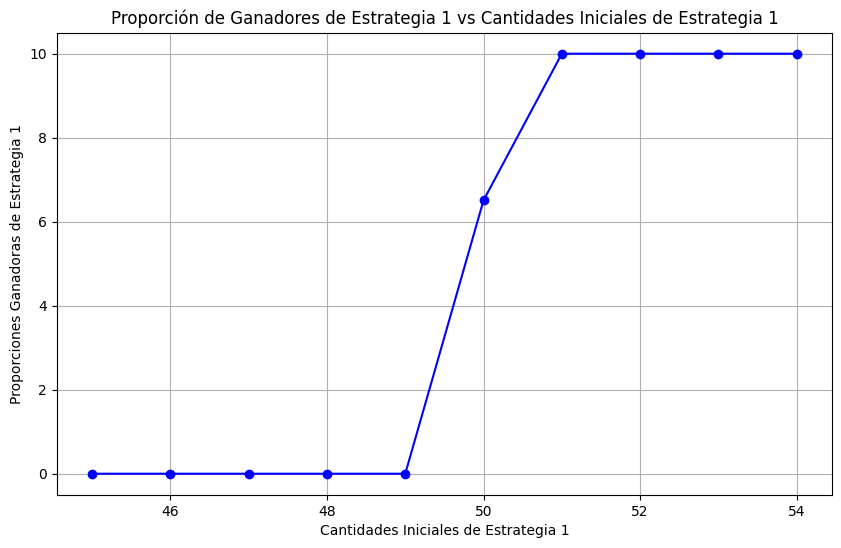

In [ ]:
criticalidad_ganador_dos_estrategias((estrat_proponer_tacaña, estrat_aceptar_siempre), (estrat_proponer_t4t, estrat_aceptar_t4t), topologia_densa, 10, 45, 55, 1)

Calculado para 60 agentes.
Calculado para 61 agentes.
Calculado para 62 agentes.
Calculado para 63 agentes.
Calculado para 64 agentes.
Calculado para 65 agentes.
Calculado para 66 agentes.
Calculado para 67 agentes.
Calculado para 68 agentes.
Calculado para 69 agentes.
Calculado para 70 agentes.


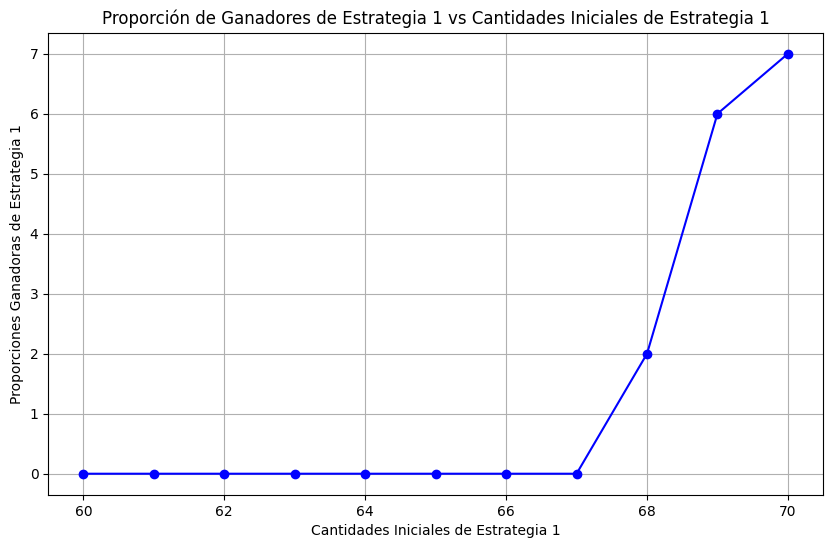

In [ ]:
criticalidad_ganador_dos_estrategias((estrat_proponer_tacaña, estrat_aceptar_siempre), (estrat_proponer_antitacaña_2, estrat_aceptar_antitacaña), topologia_densa, 10, 60, 70, 1)

Sin embargo, si comparamos la reciprocidad con la estrategia tacaña en el contexto inicial

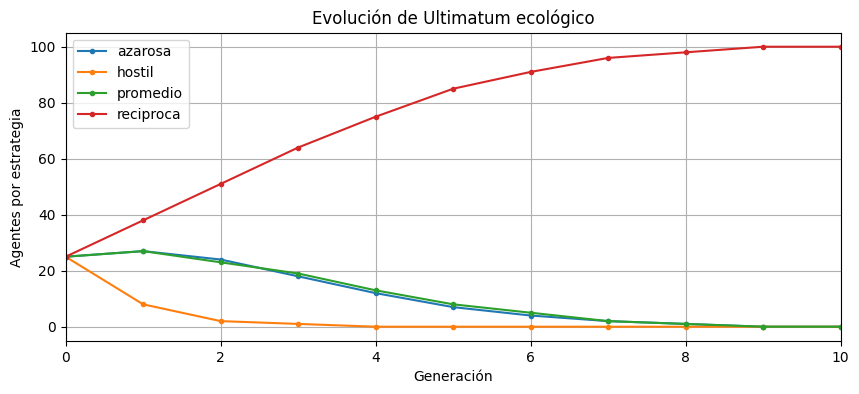

In [16]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 25),
    "hostil" : (hostil[0], hostil[1], 25),
    "promedio" : (promedio[0], promedio[1], 25),
    "reciproca" : (reciproca[0], reciproca[1], 25)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

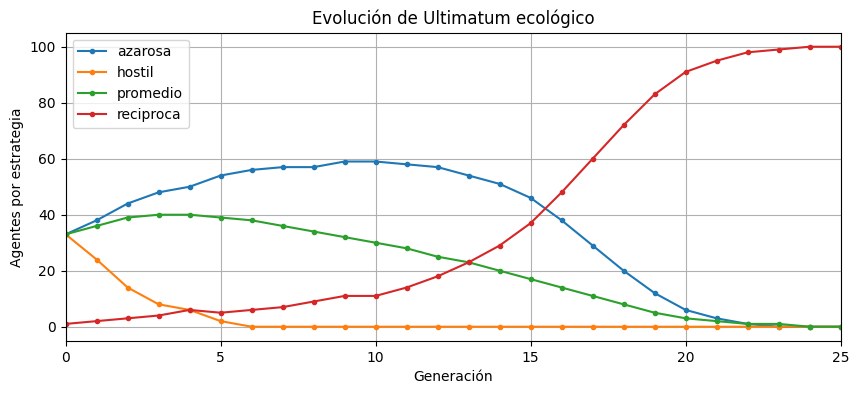

In [18]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 33),
    "hostil" : (hostil[0], hostil[1], 33),
    "promedio" : (promedio[0], promedio[1], 33),
    "reciproca" : (reciproca[0], reciproca[1], 1)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

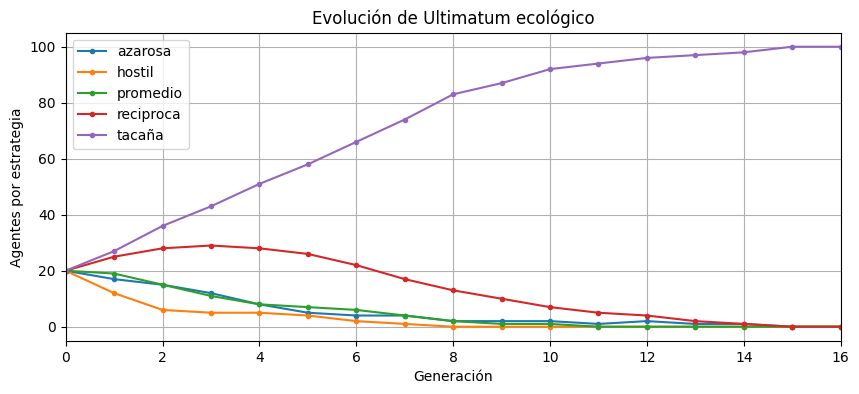

In [17]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 20),
    "hostil" : (hostil[0], hostil[1], 20),
    "promedio" : (promedio[0], promedio[1], 20),
    "reciproca" : (reciproca[0], reciproca[1], 20),
    "tacaña" : (tacaña[0], tacaña[1], 20)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

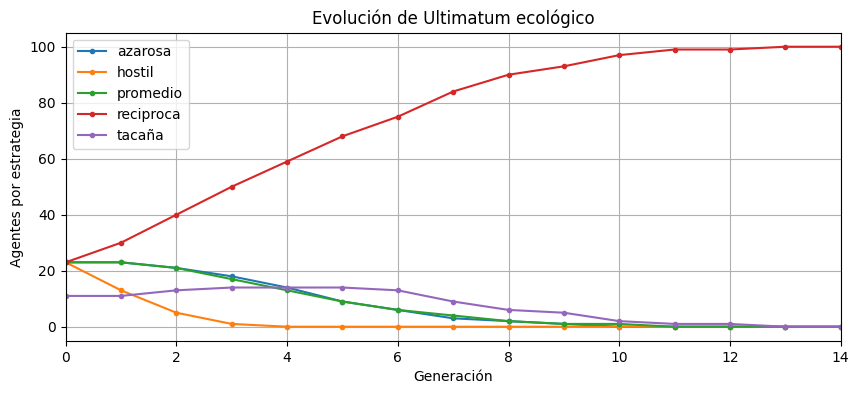

In [20]:
estrategias = {
    "azarosa" : (azarosa[0], azarosa[1], 23),
    "hostil" : (hostil[0], hostil[1], 23),
    "promedio" : (promedio[0], promedio[1], 23),
    "reciproca" : (reciproca[0], reciproca[1], 23),
    "tacaña" : (tacaña[0], tacaña[1], 11)
}

experimentos.graficar_evolucion_poblacional(estrategias, topologia_densa)

Descubrí una cosa interesante.

Comparar la reciprocidad en el contexto que 


Supuestamente evolucionamos las emocinoes de reciprocidad (enfado y gratitud) para resolver situaciones tipo dilema del prisionero iterado. Los supuestos del dilema del prisionero iterado acá no aplican.

Sin embargo, en contextos donde la mayoría de la gente se enoja (osea implementa la reciprocidad, aunque no escale como sí escala en el dilema del prisionero iterado), es conveniente usar la reciprocidad

Después de mostrarlo...

- Ver que las ofertas medias en este contexto son del 50%, la oferta promedio es del 40%? y los participantes frecuentemente rechazan ofertas menores al 50%?

### 4 - Nuestros experimentos desde el enfoque genético genera sistemáticamente la estrategia tacaña

Los algoritmos genéticos son una forma de aprendizaje por refuerzos de comportamientos adaptativos.

Seguimos una implementación de estrategias por redes neuronales que evolucionan mediante un algoritmo genético (Stanley, 2002). Cada estrategia se representa en una red neuronal, que modifica sus pesos y su topología mediante un algoritmo genético.

En nuestra implementación, evolucionamos 

La función de fitness es la misma.

La estrategia tacaña tiene algunas virtudes sobre la estrategia recíproca:
- Es **consistente**, en el sentido de que además de ser una estrategia óptima robusta en diversos contextos poblacionales, es un equilibrio de nash estable de subjuegos perfectos en el juego del ultimatum de una sola ronda.
- Es **simple**, en el sentido de que tiene una complejidad de Kolmogorov menor que la de la estrategia recíproca.
- Es **socialmente óptima**, en el sentido de que a diferencia del equilibrio de nash estable para el dilema del prisionero iterado, que genera situaciones subóptimas para la población que la ejecute, la estrategia tacaña también alcanza el óptimo social (esto no le gana a la estrategia recíproca, pero la iguala, usando consistencia y simplicidad).

Esto facilita la emergencia de la estrategia ...

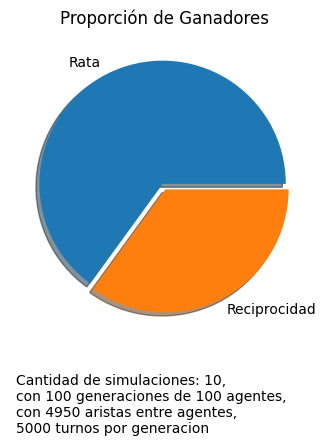

In [ ]:
graficar_proporcion_ganadores(10, topologia_densa, estrategias)
# graficar_proporcion_ganadores(10, topologia_rala, estrategias)


Concuerda con la hipótesis planteada por Axelrod, que es que la simplicidad de las estrategias genera bienestar.

Esto sugiere algo curioso, que es que nuestro comportamiento intuitivo en el ultimatum game 


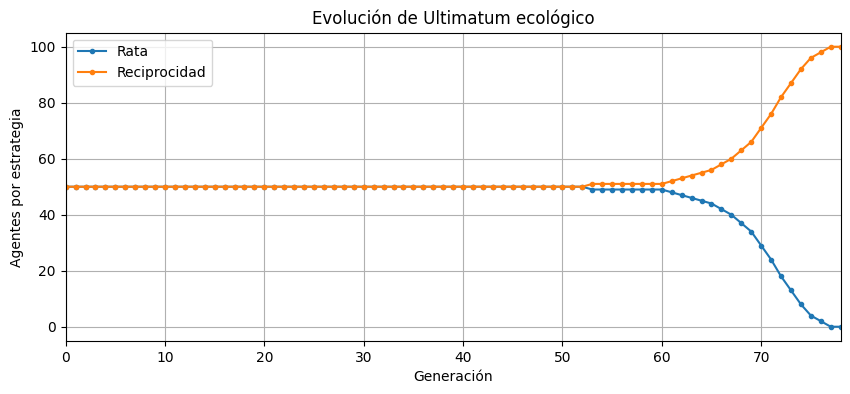

In [ ]:
graficar_evolucion_poblacional(estrategias, topologia_densa)

In [ ]:
# plt.scatter(vecinos_fitness[0], vecinos_fitness[1])

In [ ]:
def graficar_puntos_ganados_array_estrategias(array_estrategias, topologia):
    # Para mostrar que igual es un óptimo global que haya 100 estrategias ratas

    puntos_ganados = []
    agentes_iniciales = []

    for i in range(len(array_estrategias)):
        entorno = Ecologico(n_turnos_por_generacion, 1, array_estrategias[i], n_agentes, topologia)
        entorno.competir()
        agentes = entorno.ultimatum.agentes
        # print(agentes[0])
        # print(agentes[0].dinero_ganado)
        puntos_totales = 0
        for j in range(len(agentes)):
            puntos_totales += agentes[j].dinero_ganado
        
        agentes_iniciales.append(i)
        puntos_ganados.append(puntos_totales)

    plt.figure(figsize=(10, 6))
    plt.plot(agentes_iniciales, puntos_ganados, marker='o', linestyle='-', color='b')

    plt.title('Puntos ganados con más y menos agentes')
    plt.xlabel('Agentes con la estrategia recíproca')
    plt.ylabel('Puntos ganados en el ecosistema')
    plt.grid(True)
    plt.show()




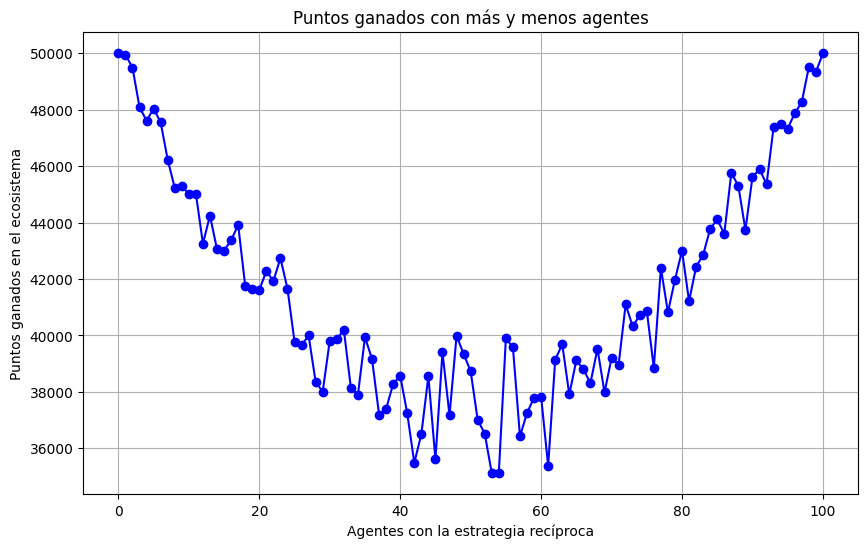

In [ ]:
def puntos_segun_presencia_de_dos_estrategias(estrategia_1, estrategia_2):
    array_estrategias = []
    for i in range(n_agentes + 1):
        estrategias = {
            "Rata" : (estrategia_1[0], estrategia_1[1], n_agentes - i),
            "Reciproca" : (estrategia_2[0], estrategia_2[1], i)
        }
        array_estrategias.append(estrategias)

    graficar_puntos_ganados_array_estrategias(array_estrategias, topologia_densa)

puntos_segun_presencia_de_dos_estrategias((estrat_proponer_rata, estrat_aceptar_siempre), (estrat_proponer_t4t, estrat_aceptar_t4t))

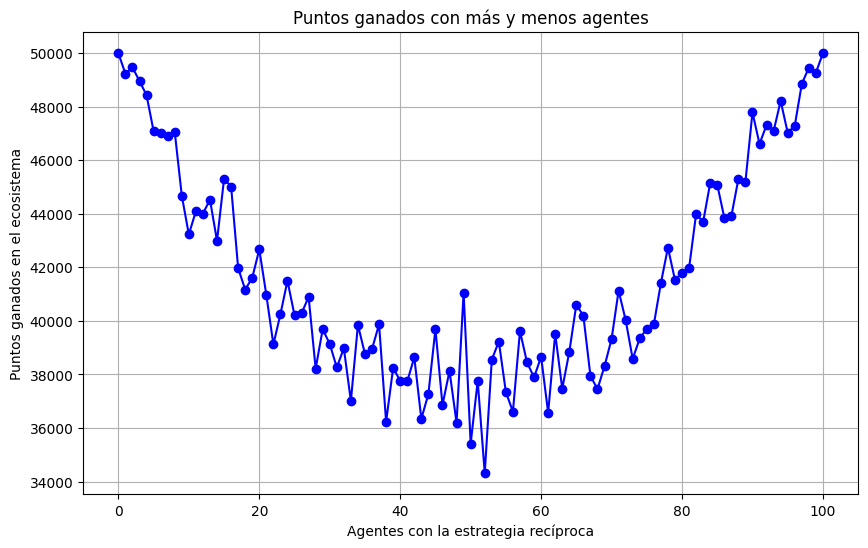

In [ ]:
puntos_segun_presencia_de_dos_estrategias((estrat_proponer_rata, estrat_aceptar_siempre), (estrat_proponer_antirrata_2, estrat_aceptar_antirrata))

- Los antirratas ganan desde que son 30.
- Los recíprocos ganan desde que son la mitad.
- En términos de bienestar poblacional, ambas propuestas son óptimas y mutuamente robustas (tienen una cuenca).
- La reciprocidad puede tener una asociación emocional (Axelrod y Hamilton) -> Si hay gente implementando reciprocidad, aunque no sea tan robusta como la reciprocidad en Axelrod (que gana incluso siendo muy poquitos) sigue siendo más o menos robusta.


- Probar con reciprocidades más "chicas" (que ofrezcan, por ejemplo, 6)




En el enfoque genético, evolucionó la estrategia tacaña. Esto es porque es una estrategia bastante robusta y muy simple (no depende del historial).

## Límites y próximos pasos

En el enfoque genético la estrategia tacaña ... Las estrategias participaron con estrategias mutadas, sería bueno cómo se comportan al interactuar sólo con otros sobrevivientes. También sería bueno ver ...

Usar el algoritmo genético para evolucionar estrategias exitosas adaptadas a una población determinada.

Usar el algoritmo genético para evaluar si la estrategia que emerge en contextos de dilema del prisionero iterado es la reciprocidad (pueden hacer falta algunas modificaciones).

Hemos analizado un conjunto limitado de estrategias en el enfoque ecológico. Sería bueno ver:
    - Relación con la topología (no consideran cantidades de vecinos de uno y el otro, podría ser interesante observar eso). Es algo que podríamos implementar fácilmente.
    - Nuevas estrategias, yo quiero ver si hay situaciones de no transitividad, (A le gana a B, B le gana a C, C le gana a A).
    - Jugar el algoritmo ecológico con estrategias distintas.



## Referencias

- Schuster, 2017, Nature.
- Brosnan, 2009, Neuroeconomics.
- Bloom, 2008, Introduction to Psychology With Paul Bloom, Yale Open Courses, Evolution, Emotion and Reason, minuto 25:20 (https://youtu.be/i5IrSEIPdwk?si=WBHpx7UftK5jRSnt&t=1521).
- Axelrod, 1983, The Evolution of Cooperation

In [22]:
6%1

0